In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats
from imblearn.metrics import sensitivity_specificity_support
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel

In [2]:
data = pd.read_csv('Sold_And_Stats_Edited_New_a.csv')
data.head()

,Listing Number,Street Number,Street Number Modifier,Street Direction,Street Name,Street Suffix,Street Post Direction,City,State,Zip Code,...,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Style Code,Property Type,Selling Date
0,825199,1118,NaN,NaN,Alki,Ave,SW,Seattle,WA,98116,...,0.0,3,4080.0,1900000.0,1500000.0,78.947368,1000,10 - 1 Story,House,5/1/2017 0:00
1,902993,12805,NaN,NaN,78th,Ave,S,Seattle,WA,98178,...,0.0,0,10500.0,159000.0,155000.0,97.484277,580,10 - 1 Story,House,3/21/2018 0:00
2,1072254,810,NaN,NaN,34th,Ave,NaN,Seattle,WA,98122,...,0.0,0,4600.0,650000.0,650000.0,100.000000,1060,10 - 1 Story,House,5/5/2017 0:00
3,1106354,8735,NaN,NaN,1st,Ave,NW,Seattle,WA,98117,...,0.0,0,6350.0,410000.0,448000.0,109.268293,870,10 - 1 Story,House,5/16/2017 0:00
4,1110111,10403,NaN,NaN,15th,Ave,NaN,Seattle,WA,98125,...,0.0,0,6120.0,498000.0,475000.0,95.381526,1550,10 - 1 Story,House,5/15/2017 0:00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57654 entries, 0 to 57653
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Listing Number                 57654 non-null  int64  
 1   Street Number                  57654 non-null  int64  
 2   Street Number Modifier         2257 non-null   object 
 3   Street Direction               17249 non-null  object 
 4   Street Name                    57654 non-null  object 
 5   Street Suffix                  55733 non-null  object 
 6   Street Post Direction          34223 non-null  object 
 7   City                           57654 non-null  object 
 8   State                          57654 non-null  object 
 9   Zip Code                       57654 non-null  int64  
 10  Area                           57654 non-null  object 
 11  Bathrooms                      57654 non-null  float64
 12  Bedrooms                       57654 non-null 

In [4]:
data.describe()

,Listing Number,Street Number,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage
count,5.765400e+04,57654.000000,57654.000000,57654.000000,57654.000000,56373.000000,5.765400e+04,5.765400e+04,57654.000000,57654.000000
mean,1.525852e+06,4483.526364,98123.081590,1.948035,2.800569,7489.130311,8.161820e+05,8.371555e+05,102.968980,1725.200836
std,2.434312e+05,5345.805556,79.643394,0.785597,1.150625,20413.391594,5.581261e+05,5.459461e+05,8.235103,892.856237
min,7.071210e+05,0.000000,88117.000000,0.000000,0.000000,0.000000,3.995000e+04,3.800000e+04,28.011204,0.000000
25%,1.313165e+06,1521.000000,98107.000000,1.500000,2.000000,1298.000000,5.350000e+05,5.490000e+05,98.839050,1080.000000
50%,1.544101e+06,3415.000000,98117.000000,1.750000,3.000000,4500.000000,6.999500e+05,7.250000e+05,100.000000,1558.000000
75%,1.742669e+06,6976.750000,98126.000000,2.500000,3.000000,6936.000000,9.000000e+05,9.500000e+05,105.108118,2180.000000
max,1.934438e+06,922020.000000,99810.000000,10.500000,16.000000,493925.000000,3.500000e+07,3.075000e+07,266.315789,12280.000000


In [5]:
#Drop un-needed columns

data.drop(['Listing Number', 'Street Number', 'Street Number Modifier', 'Street Direction', 'Street Name', 'Street Suffix', 'Street Post Direction', 'City', 'State', 'Area', 'Selling Date'], axis=1,inplace=True)

In [6]:
data.head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Style Code,Property Type
0,98116,0.0,3,4080.0,1900000.0,1500000.0,78.947368,1000,10 - 1 Story,House
1,98178,0.0,0,10500.0,159000.0,155000.0,97.484277,580,10 - 1 Story,House
2,98122,0.0,0,4600.0,650000.0,650000.0,100.000000,1060,10 - 1 Story,House
3,98117,0.0,0,6350.0,410000.0,448000.0,109.268293,870,10 - 1 Story,House
4,98125,0.0,0,6120.0,498000.0,475000.0,95.381526,1550,10 - 1 Story,House


In [7]:
data.dtypes

Zip Code                           int64
Bathrooms                        float64
Bedrooms                           int64
Lot Square Footage               float64
Listing Price                    float64
Selling Price                    float64
Sold to List Price Percentage    float64
Square Footage                     int64
Style Code                        object
Property Type                     object
dtype: object

In [8]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [9]:
data.dropna(subset=["Bathrooms", "Bedrooms", "Listing Price"], how="all", inplace=True)

In [10]:
data.dropna(how='any', inplace=True)

In [11]:
data = data.fillna(0)

In [12]:
data[["Bathrooms", "Bedrooms", "Listing Price", "Selling Price"]] = data[["Bedrooms", "Bathrooms", "Listing Price", "Selling Price"]].apply(pd.to_numeric)

In [13]:
data = data.astype({"Bathrooms": int, "Bedrooms": int, "Listing Price": int, "Selling Price": int})

In [14]:
StyleCode = {'10 - 1 Story': 10,
             '11 - 1 1/2 Story':11,
             '12 - 2 Story': 12,
             '13 - Tri-Level': 13,
             '14 - Split Entry':14,
             '15 - Multi Level': 15,
             '16 - 1 Story w/Bsmnt.':16,
             '17 - 1 1/2 Stry w/Bsmt':17, 
             '18 - 2 Stories w/Bsmnt':18,
             '20 - Manuf-Single Wide': 20,
             '21 - Manuf-Double Wide': 21,
             '22 - Manuf-Triple Wide': 22,
             '24 - Floating Home/On-Water Res': 24,
             '30 - Condo (1 Level)': 30,
             '31 - Condo (2 Levels)':31,
             '32 - Townhouse':32,
             '33 - Co-op': 33,
             '34 - Condo (3 Levels)': 34, 
             '35 - Garage Storage': 35, 
             '45 - Moorage': 45
            }

In [15]:
data.replace({"Style Code": StyleCode}, inplace=True)

In [16]:
data = data.astype({"Style Code": int})

In [17]:
PropertyType = {'House': 1,
                'Condo': 2,
                'Townhouse': 3,
               }

In [18]:
data.replace({"Property Type": PropertyType}, regex=True, inplace=True)

In [19]:
data = data.astype({"Property Type": int})

In [20]:
data.head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Style Code,Property Type
0,98116,3,0,4080.0,1900000,1500000,78.947368,1000,10,1
1,98178,0,0,10500.0,159000,155000,97.484277,580,10,1
2,98122,0,0,4600.0,650000,650000,100.000000,1060,10,1
3,98117,0,0,6350.0,410000,448000,109.268293,870,10,1
4,98125,0,0,6120.0,498000,475000,95.381526,1550,10,1


In [21]:
data.dtypes

Zip Code                           int64
Bathrooms                          int64
Bedrooms                           int64
Lot Square Footage               float64
Listing Price                      int64
Selling Price                      int64
Sold to List Price Percentage    float64
Square Footage                     int64
Style Code                         int64
Property Type                      int64
dtype: object

In [22]:
data.head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Style Code,Property Type
0,98116,3,0,4080.0,1900000,1500000,78.947368,1000,10,1
1,98178,0,0,10500.0,159000,155000,97.484277,580,10,1
2,98122,0,0,4600.0,650000,650000,100.000000,1060,10,1
3,98117,0,0,6350.0,410000,448000,109.268293,870,10,1
4,98125,0,0,6120.0,498000,475000,95.381526,1550,10,1


<AxesSubplot:xlabel='Square Footage', ylabel='Listing Price'>

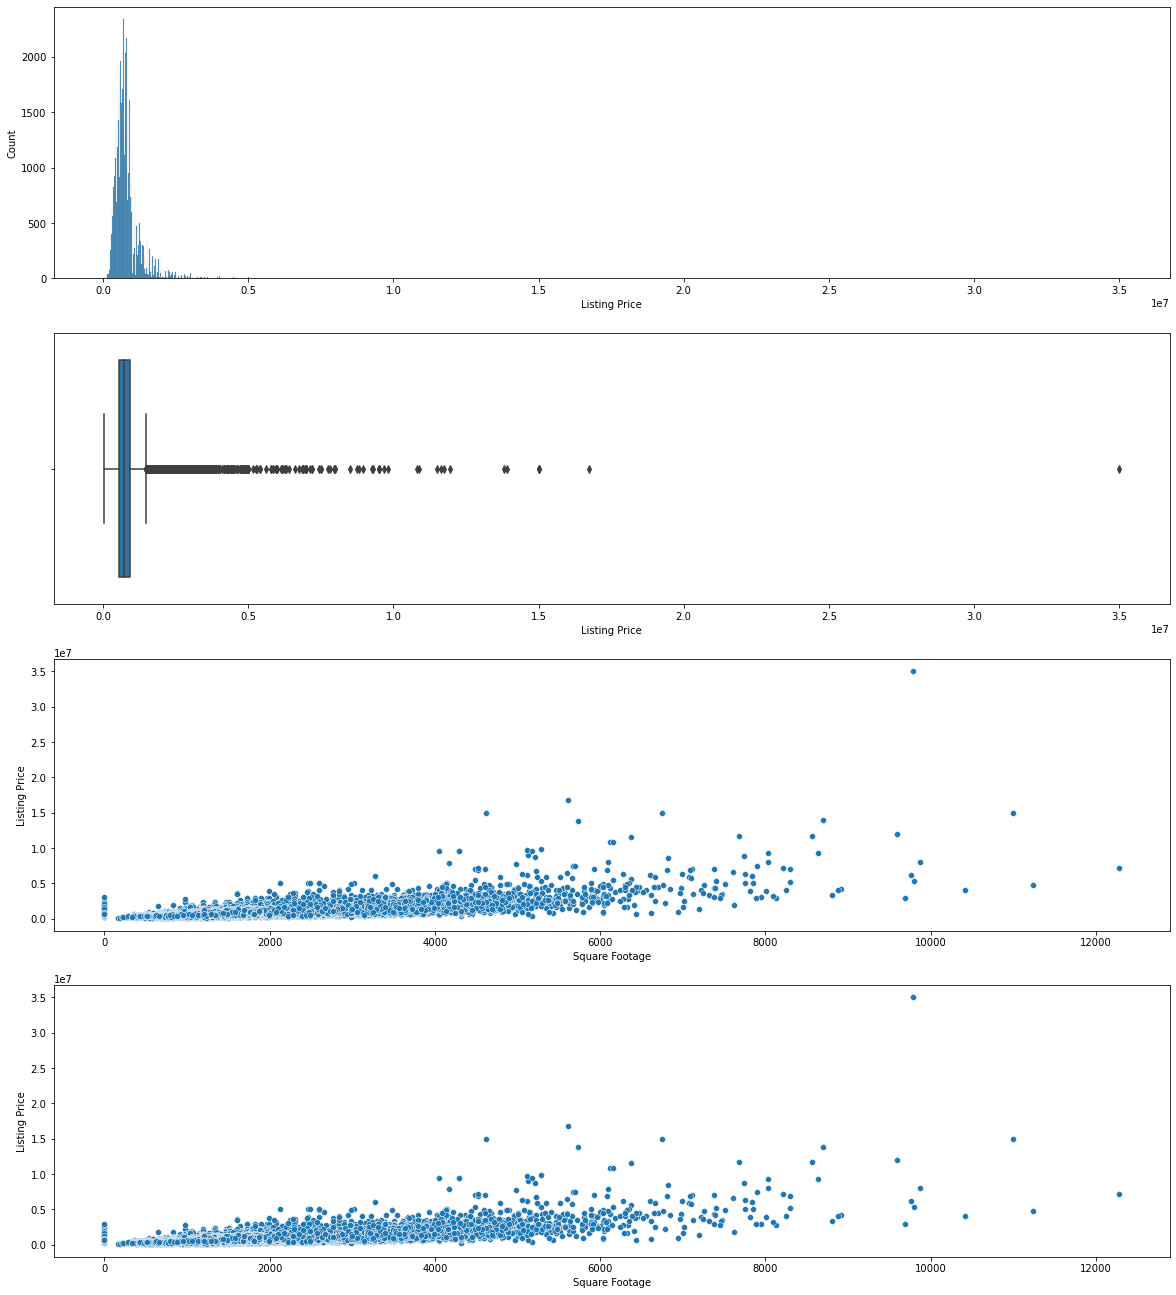

In [23]:
#Histogram of prices
#Box plot of prices
#Scatterplot of prices vs square footage
#Scatterplot of prices vs lot size

f,ax = plt.subplots(4,1,figsize=(20,23))
sns.histplot(x = 'Listing Price',data=data, ax=ax[0])
sns.boxplot(x = 'Listing Price',data=data, ax=ax[1])
sns.scatterplot(x= 'Square Footage',y = 'Listing Price',data=data, ax=ax[2])
sns.scatterplot(x= 'Square Footage',y = 'Listing Price',data=data, ax=ax[3])

In [24]:
#DATA CLEANING

data['Listing Price'] = data['Listing Price'].round(decimals=2)

In [25]:
#Houses where bedroom is 0

data.loc[(data['Bedrooms'] == 0)].head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Style Code,Property Type
0,98116,3,0,4080.0,1900000,1500000,78.947368,1000,10,1
1,98178,0,0,10500.0,159000,155000,97.484277,580,10,1
2,98122,0,0,4600.0,650000,650000,100.000000,1060,10,1
3,98117,0,0,6350.0,410000,448000,109.268293,870,10,1
4,98125,0,0,6120.0,498000,475000,95.381526,1550,10,1


In [26]:
#Houses with 0 bathrooms

data.loc[(data['Bathrooms'] == 0)].head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Style Code,Property Type
1,98178,0,0,10500.0,159000,155000,97.484277,580,10,1
2,98122,0,0,4600.0,650000,650000,100.000000,1060,10,1
3,98117,0,0,6350.0,410000,448000,109.268293,870,10,1
4,98125,0,0,6120.0,498000,475000,95.381526,1550,10,1
7,98125,0,0,7563.0,399000,370000,92.731830,700,10,1


In [27]:
#Check the outliers (most expensive)

data.sort_values(by=['Listing Price'],ascending=False).head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Style Code,Property Type
32936,98122,4,6,50705.0,35000000,30750000,87.857143,9791,18,1
13113,98112,4,4,32856.0,16750000,14275000,85.223881,5612,15,1
31817,98112,4,3,64981.0,15000000,13750000,91.666667,6750,18,1
13164,98102,5,6,31000.0,15000000,10960000,73.066667,11000,15,1
23147,98105,4,3,67106.0,15000000,14850000,99.000000,4620,16,1


In [28]:
#Check the outliers (cheapest)

data.loc[(data['Listing Price'] > 0)].sort_values(by=['Listing Price']).head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Style Code,Property Type
32960,98102,0,0,4064.0,39950,38000,95.118899,168,30,2
32967,98109,0,0,7200.0,40000,40000,100.000000,185,30,2
34810,98168,1,1,0.0,67500,73000,108.148148,680,30,2
4553,98118,0,0,5715.0,95000,253000,266.315789,1500,11,1
44523,98146,1,1,37800.0,99950,100600,100.650325,492,31,2


In [29]:
#Check the outliers (widest sqft_living)

data.sort_values(by=['Square Footage'],ascending=False).head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Style Code,Property Type
13161,98112,7,6,16874.0,7125000,6400000,89.824561,12280,15,1
13170,98177,8,8,194167.0,4800000,3600000,75.000000,11240,15,1
13164,98102,5,6,31000.0,15000000,10960000,73.066667,11000,15,1
32943,98112,5,6,10000.0,3995000,4850000,121.401752,10416,18,1
32949,98104,0,0,10.0,8000000,7500000,93.750000,9876,30,2


In [30]:
#Create dataframe of missing datapoint by appending price = 0 and bedrooms = 0

missing = data.loc[(data['Listing Price'] == 0)].append(data.loc[(data['Bathrooms'] == 0)])

In [31]:
# Create list that contains index of error datapoint

missing_index_list = missing.reset_index()['index'].to_list()

In [32]:
# Sort the list so it won't change the index

missing_index_list.sort(reverse = True)

In [33]:
# Drop error datapoint

data = data.drop(missing_index_list,axis=0)

In [34]:
data.head()

,Zip Code,Bathrooms,Bedrooms,Lot Square Footage,Listing Price,Selling Price,Sold to List Price Percentage,Square Footage,Style Code,Property Type
0,98116,3,0,4080.0,1900000,1500000,78.947368,1000,10,1
5,98118,3,0,6000.0,399950,450000,112.514064,960,10,1
6,98125,3,0,9000.0,799950,775000,96.881055,2200,10,1
8,98136,2,0,4000.0,350000,367000,104.857143,830,10,1
13,98528,3,0,5500.0,700000,760000,108.571429,1060,10,1


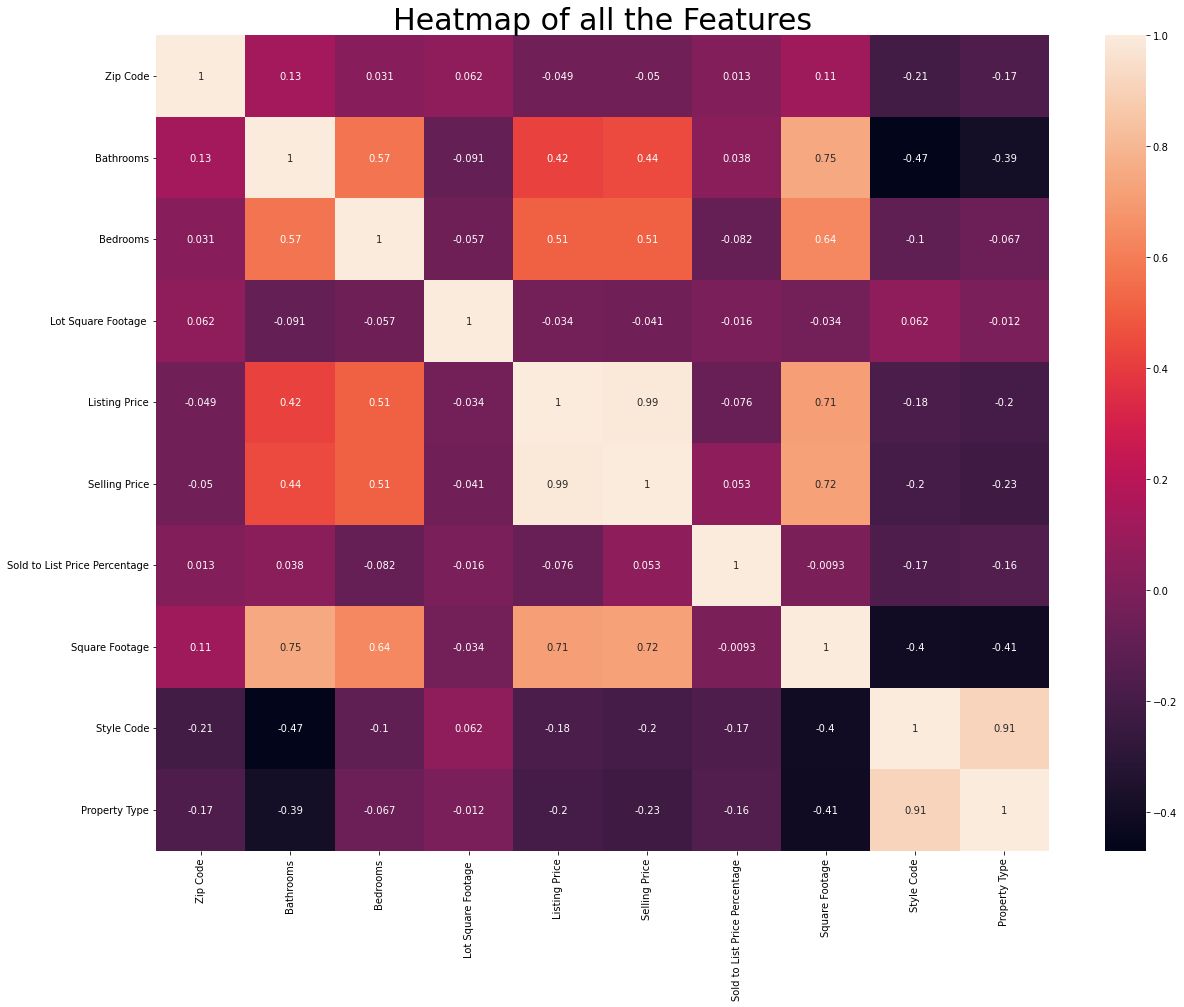

In [35]:
#Correlation Check

features = data
encoder = LabelEncoder()
features['Zip Code'] = encoder.fit_transform(features['Zip Code'])

plt.figure(figsize=(20,15))
sns.heatmap(features.corr(), annot=True)
plt.title("Heatmap of all the Features", fontsize = 30);
plt.show()


In [36]:
#Split data to X for variable input, and y for target class

y = features['Selling Price']
X = features.drop(['Selling Price'],axis=1)

In [37]:
#Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
##### LINEAR REGRESSION MODEL #####

reg = LinearRegression()
reg.fit(X_train, y_train)

print('coef of determination training ', reg.score(X_train, y_train))
print('coef of determination testing ', reg.score(X_test, y_test))
print()
print('coefficient')
print(reg.coef_)
print()
print('intercept')
print(reg.intercept_)
print()
reg_pred = list(reg.predict(X_test))
for i in reg_pred[0:10]:
  print('Prediction price of house', reg_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real price of house', list(y_test).index(i)+1, ': $', i)
print()
reg_mae = reg.predict(X_train)
print('Mean Absolute Error: ',mean_absolute_error(y_train, reg_mae))
mse = mean_squared_error(y_test,reg_pred)
print('Root Mean Square Error : ', np.sqrt(mse))

coef of determination training  0.9918685246726868
coef of determination testing  0.987855628453226

coefficient
[-3.70106287e+02  1.67280911e+03  4.57723188e+03 -1.12062020e-01
  9.48000820e-01  8.41617276e+03  1.81409324e+01  6.54643176e+02
 -4.92610262e+03]

intercept
-841730.7387477673

Prediction price of house 1 : $ 416763.50407106604
Prediction price of house 2 : $ 973281.6054742349
Prediction price of house 3 : $ 876855.7620492562
Prediction price of house 4 : $ 600653.5059816294
Prediction price of house 5 : $ 749252.9355766488
Prediction price of house 6 : $ 621053.9196315604
Prediction price of house 7 : $ 581200.9175882068
Prediction price of house 8 : $ 305325.5140457853
Prediction price of house 9 : $ 672818.8586762164
Prediction price of house 10 : $ 749618.8683547251

Real price of house 1 : $ 425000
Real price of house 2 : $ 935000
Real price of house 3 : $ 880000
Real price of house 4 : $ 630000
Real price of house 5 : $ 747000
Real price of house 6 : $ 525000
Real pr

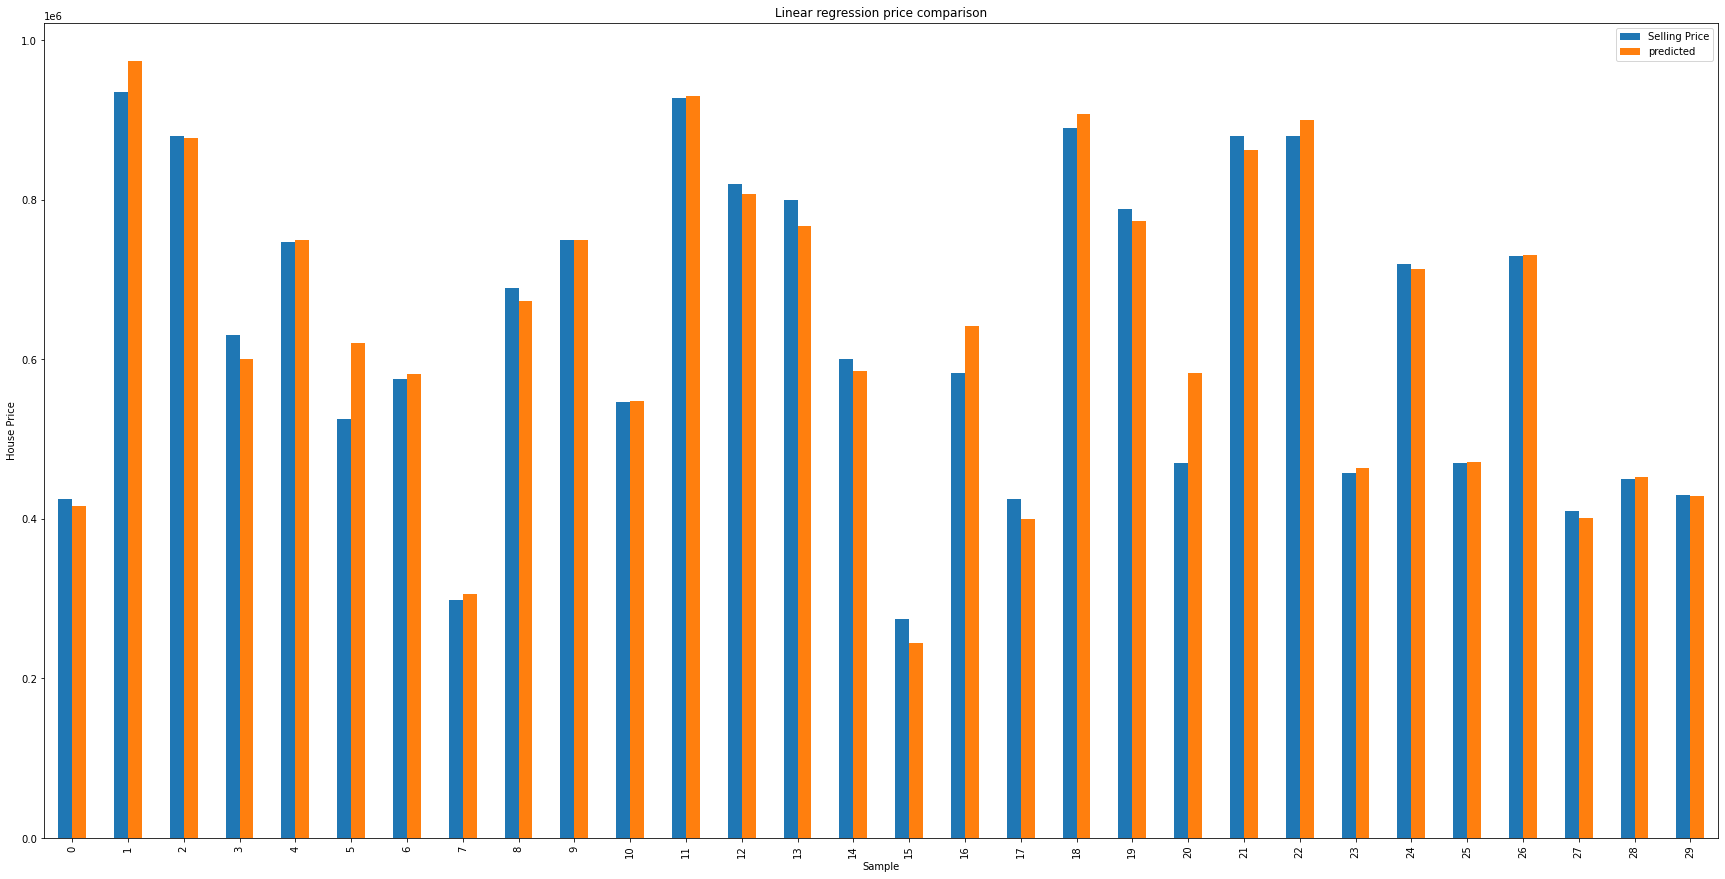

In [44]:
#VISUALIZE LINEAR REGRESSION MODEL

reg_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
reg_pred_price = pd.DataFrame(reg_pred[:30], columns = ['predicted'])
reg_result = pd.concat([reg_real_price, reg_pred_price], axis=1) 
reg_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (30, 15)
plt.title("Linear regression price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

In [40]:
##### DECISION TREE MODEL #####

dt = DecisionTreeRegressor(max_depth=18)
dt.fit(X_train, y_train)

print('coef of determination training ',dt.score(X_train, y_train))
print('coef of determination testing ',dt.score(X_test, y_test))
print()
print('prediction')
dt_pred = list(dt.predict(X_test))
for i in dt_pred[0:10]:
  print('Prediction price of house', dt_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real price of house', list(y_test).index(i)+1, ': $', i)
print()
dt_mae = dt.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, dt_mae))
mse = mean_squared_error(y_test,dt_pred)
print('Root Mean Square Error : ', np.sqrt(mse))

coef of determination training  0.9999999005210134
coef of determination testing  0.9956969897257668

prediction
Prediction price of house 1 : $ 424961.8169014084
Prediction price of house 2 : $ 900000.0
Prediction price of house 3 : $ 880000.0
Prediction price of house 4 : $ 630000.0
Prediction price of house 5 : $ 747500.0
Prediction price of house 6 : $ 522000.0
Prediction price of house 7 : $ 576000.0
Prediction price of house 8 : $ 299000.0
Prediction price of house 9 : $ 689954.5769230769
Prediction price of house 10 : $ 749974.5416666666

Real price of house 1 : $ 425000
Real price of house 2 : $ 935000
Real price of house 3 : $ 880000
Real price of house 4 : $ 630000
Real price of house 5 : $ 747000
Real price of house 6 : $ 525000
Real price of house 7 : $ 575950
Real price of house 8 : $ 298500
Real price of house 9 : $ 690000
Real price of house 10 : $ 750000

Mean Absolute Error:  35.23195720325148
Root Mean Square Error :  33851.385035929656


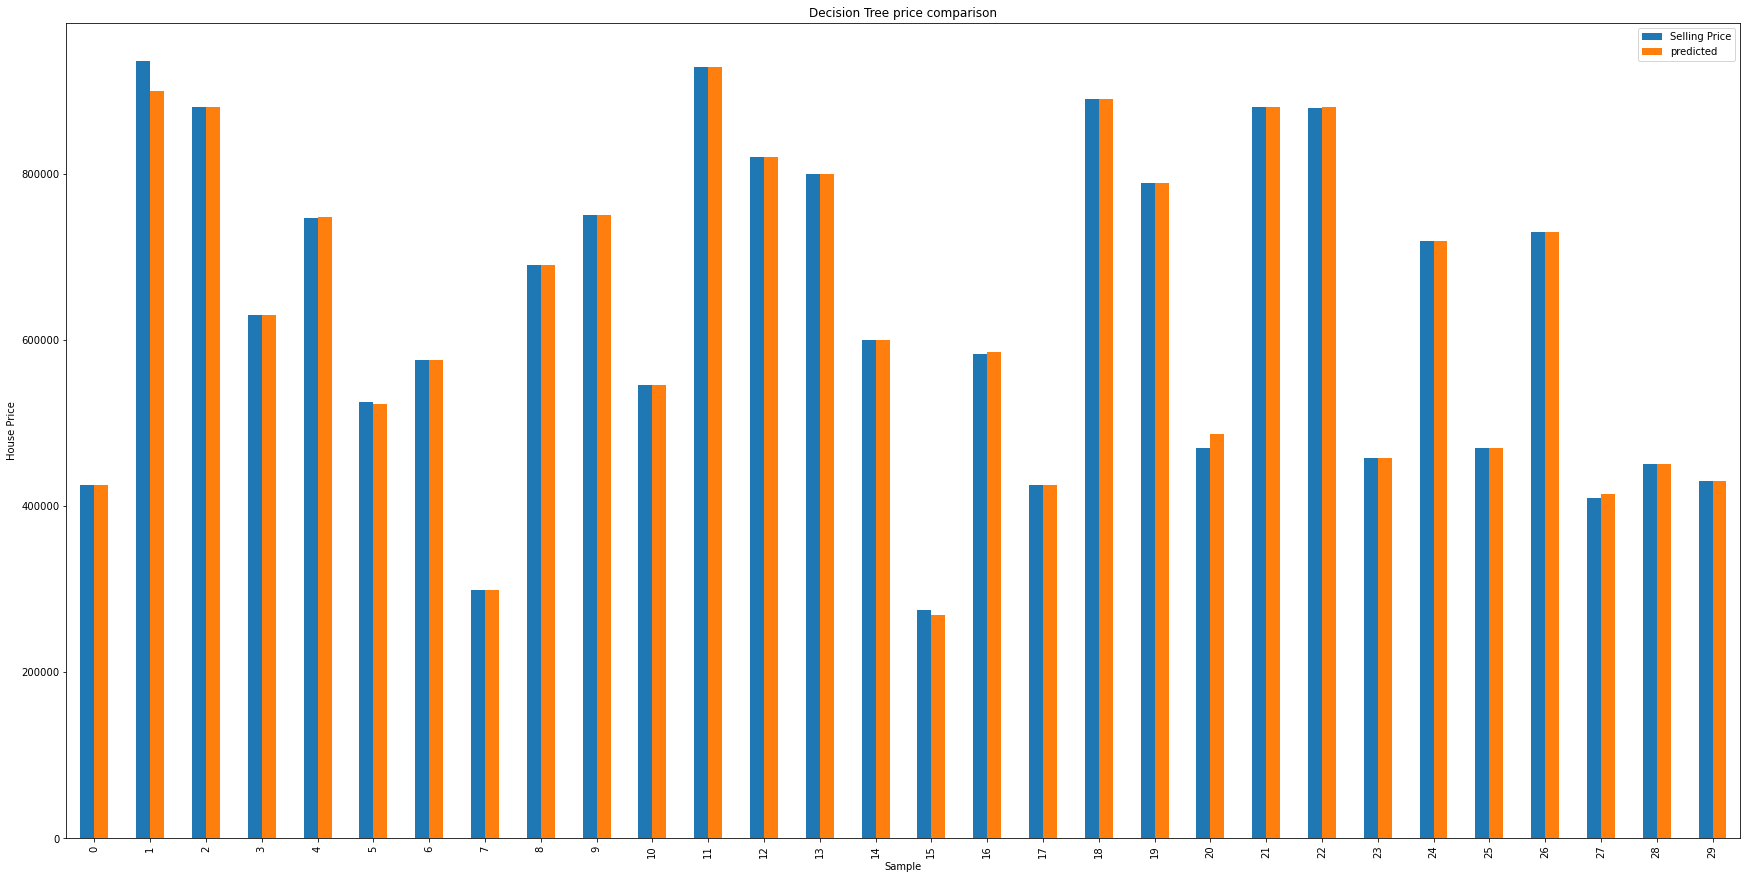

In [41]:
#VISUALIZE DECISION TREE

dt_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
dt_pred_price = pd.DataFrame(dt_pred[:30], columns = ['predicted'])
dt_result = pd.concat([dt_real_price, dt_pred_price], axis=1) 
dt_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (30, 15)
plt.title("Decision Tree price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

In [42]:
##### RANDOM FOREST MODEL #####

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

print('coef of determination training ',rf.score(X_train, y_train))
print('coef of determination testing ',rf.score(X_test, y_test))
print()
print('prediction')
rf_pred = list(rf.predict(X_test))
for i in rf_pred[0:10]:
  print('Prediction price of house', rf_pred.index(i)+1, ': $', i)
print()
for i in list(y_test[0:10]):
  print('Real price of house', list(y_test).index(i)+1, ': $', i)
print()
rf_mae = rf.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, rf_mae))

mse = mean_squared_error(y_test,rf_pred)
print('Root Mean Square Error : ', np.sqrt(mse))

coef of determination training  0.9956634019094649
coef of determination testing  0.9919039669931062

prediction
Prediction price of house 1 : $ 424974.0
Prediction price of house 2 : $ 924750.0
Prediction price of house 3 : $ 879027.0
Prediction price of house 4 : $ 630585.0
Prediction price of house 5 : $ 747084.28
Prediction price of house 6 : $ 522955.0
Prediction price of house 7 : $ 576068.85
Prediction price of house 8 : $ 299028.9
Prediction price of house 9 : $ 689969.7
Prediction price of house 10 : $ 750000.0

Real price of house 1 : $ 425000
Real price of house 2 : $ 935000
Real price of house 3 : $ 880000
Real price of house 4 : $ 630000
Real price of house 5 : $ 747000
Real price of house 6 : $ 525000
Real price of house 7 : $ 575950
Real price of house 8 : $ 298500
Real price of house 9 : $ 690000
Real price of house 10 : $ 750000

Mean Absolute Error:  1215.8112476927806
Root Mean Square Error :  46432.9617397881


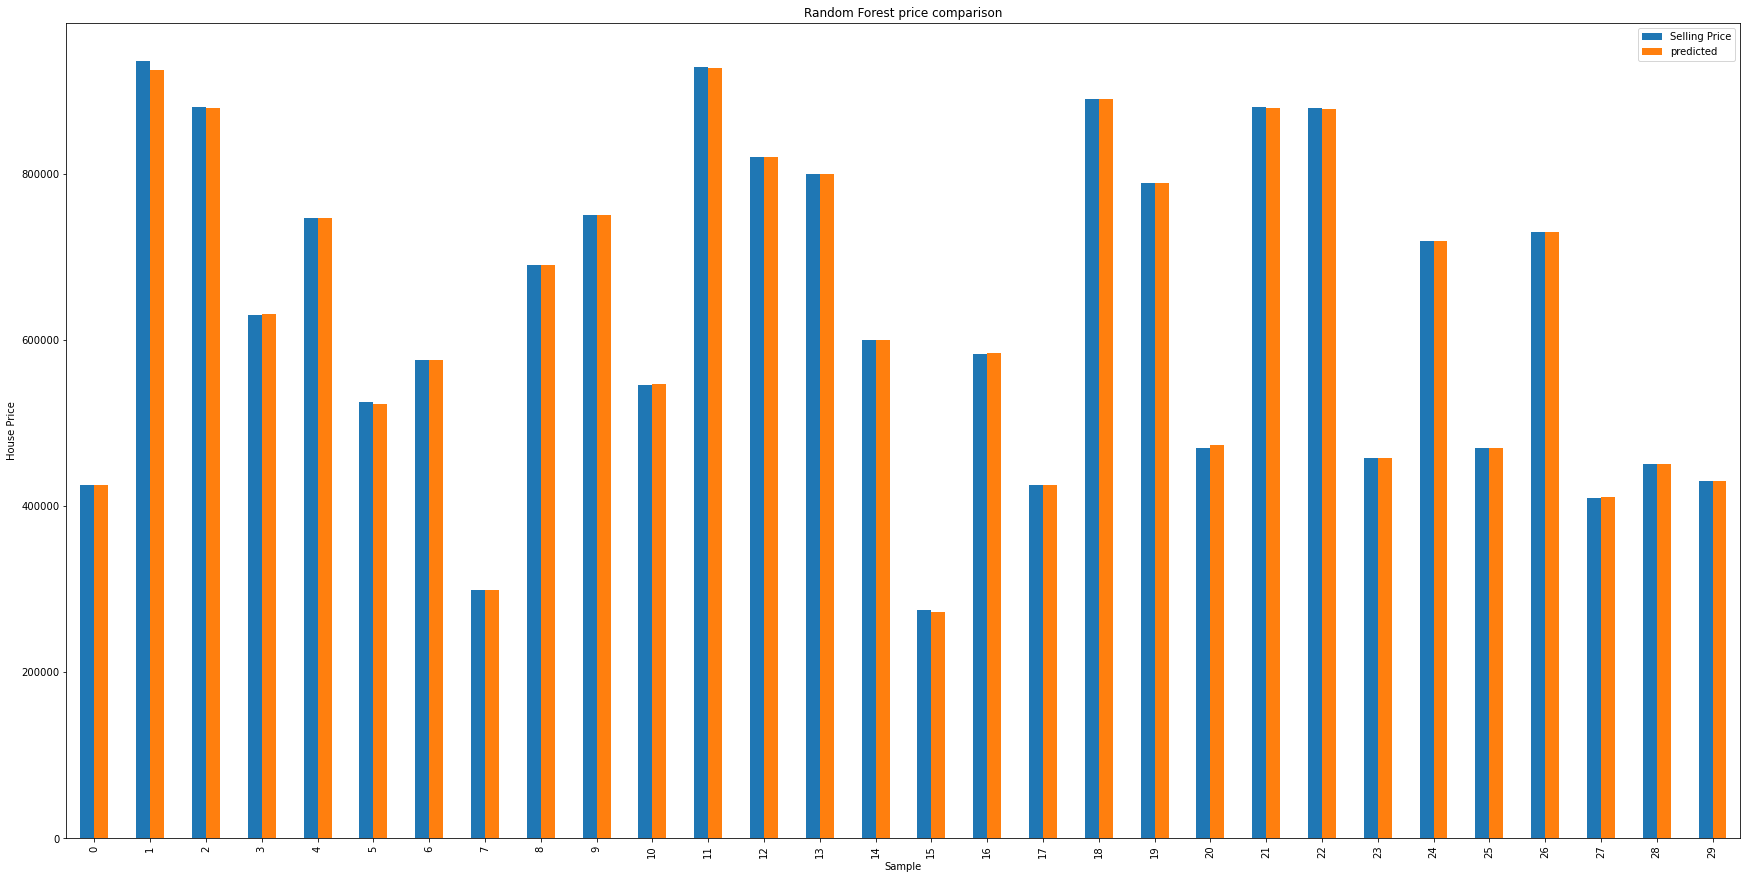

In [43]:
#VISUALIZE RANDOM FOREST MODEL

rf_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
rf_pred_price = pd.DataFrame(rf_pred[:30], columns = ['predicted'])
rf_result = pd.concat([rf_real_price, rf_pred_price], axis=1) 
rf_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (30, 15)
plt.title("Random Forest price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()